# Численные методы

Пусть даны два наборы чисел:

(i) $ [x_0, x_1, \ldots, x_n] $ 
(ii) $ [y_0, y_1, \ldots, y_n] $

Теорема. Пусть размерность наборов равна n+1, тогда сущесвует и единственен полином степени n, которые проходит через узлы точек. 
Определение. Такой многочлен будем называть интерполяционным.

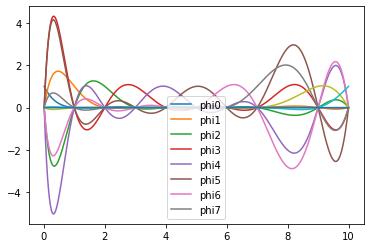

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

# рассматриваемая функция
def f(x):
	return e**x/2**x * sin(1/(x + 0.01)) * asin(sin(x))

xs = [0.01, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11]
ys = [f(x) for x in xs]


# базисные полиномы Лагранжа
def phi(i, x):
	ret = 1
	for j in range(len(xs)):
		if j == i:
			continue
		ret *= (x - xs[j]) / (xs[i] - xs[j])
	return ret

# множество точек для рассмотрения
Ox = np.arange(0.01, len(xs) - 1 + 0.01, 0.01)

for i in range(len(xs)):
    Ophi = np.array([phi(i, x) for x in Ox])
    plt.plot(Ox, Ophi)
    
plt.legend(['phi0', 'phi1', 'phi2', 'phi3', 'phi4', 'phi5', 'phi6', 'phi7'], loc ="lower center")

plt.show()

Теорема. $ f(x_0; x_1; \ldots; x_n) =  \sum_{i=0}^{n} \frac{f(x_i)}{\prod_{j=0, j \ne i}^{n} (x_i - x_j)}$

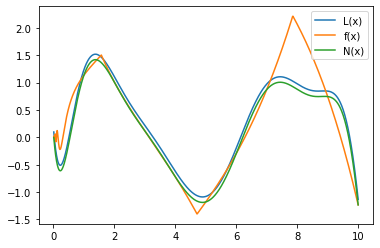

In [174]:
# Интерполяционный полином Лагранджа
def L(x):
    ret = 0
    for i in range(len(xs)):
        ret += ys[i] * phi(i, x)
    return ret

# Разделённая разность k-порядка
def divided_def(k):
    s = 0
    for i in range(k):
        p = 1
        for j in range(k):
            if j == i:
                continue
            p *= (xs[i] - xs[j])
        s += ys[i]/p
    return s

# Интерполяционный полином Ньютона
def N(x):
    s = ys[0]
    for k in range(1, len(xs)):
        p = 1
        for i in range(k):
            p *= (x- xs[i])
        s += divided_def(k+1) * p
    return s

plt.plot(Ox, np.array([L(x) + 0.1 for x in Ox]))
plt.plot(Ox, np.array([f(x) for x in Ox]))
plt.plot(Ox, np.array([N(x) for x in Ox]))
plt.legend(['L(x)', 'f(x)', 'N(x)'], loc='upper right')
plt.show()

Теорема (связь разделённой разности с производной). Пусть функция $f$ n-раз дифференцируема на интервале (a, b); 
точки $x_0, x_1, \ldots, x_n \in (a, b) $; $\underline{x} = \min(x_0, x_1, \ldots, x_n), \overline{x} = \min(x_0, x_1, \ldots, x_n)$. Тогда существует точка $\xi \in (\underline{x}, \overline{x})$, такая что 


$ f(x_0; x_1; \dots; x_n) = \frac{1}{n!} f^{(n)}(\xi). $

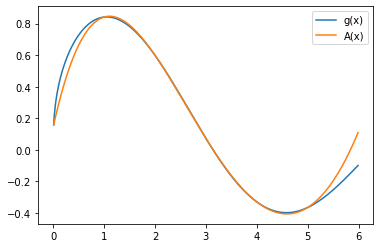

In [220]:
import numpy as np
import numpy.linalg as lin

# рассматриваемая функция
def g(x):
    return x**0.4 * sin(x)/x

d = np.array([0.01, 1, 2, 3, 4, 5])
eg = np.array([g(x) for x in d])
n = len(d)


V = np.vander(d, increasing=True)
b = np.array([[eg[i]] for i in range(n)])
a = lin.inv(V) @ b

# Алгебраическая интерполяция
def A(x):
    ret = 0
    for p in range(n):
        ret += a[p] * x**p
    return ret

Od = np.arange(0.01, n, 0.01)
plt.plot(Od, [g(x) for x in Od])
plt.plot(Od, [A(x) for x in Od])
plt.legend(['g(x)', 'A(x)'], loc='upper right')
plt.show()

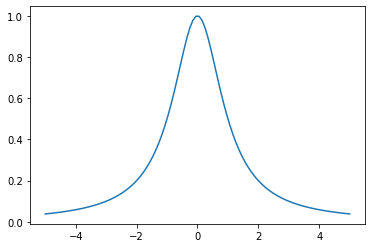

In [33]:
import random
runge = lambda x: 1/(1 + x**2)


edge = 5
den = 100
Dom = np.linspace(-edge, edge, 100)
Ran = np.array([runge(x) for x in Dom])

n = 4
eps = 0.01
nodes = np.array([-edge] + sorted(random.uniform(-edge - eps, edge + eps) for _ in range(n - 1)) + [+edge]) 
values = np.array([runge(x) for x in nodes])


plt.plot(Dom, Ran)
plt.show()

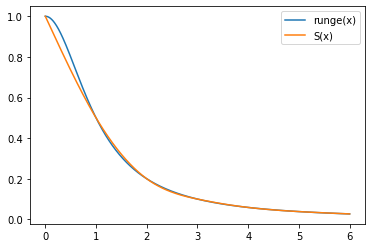

In [32]:
# Интерполяция кубическими сплайнами
def thomas(a, b, c, d):
    n = len(d)
    gamma = [0] * (n + 1)
    
    for i in range(2, (n - 1) + 1):
        coef = a[i]/b[i-1]
        a[i] = 0
        b[i] -= coef * c[i-1]
        d[i] -= coef * d[i-1]
    
    for i in range(n - 1, 1 - 1, -1):
        coef = c[i-1]/b[i]
        c[i - 1] = 0
        d[i - 1] -= d[i]*coef
    
    for i in range(1, (n-1) + 1):
        gamma[i] = d[i]/b[i]
    
    return gamma

X = [0, 1, 2, 3, 4, 5, 6]
Y = [runge(x) for x in X]

n = len(X) - 1
h = [0] + [X[i] - X[i-1] for i in range(1, n + 1)]
a = [0, 0] + [h[i]/6 for i in range(2, n)]
b = [0] + [(h[i] + h[i+1])/3 for i in range(1, n)]
c = [0] + [h[i+1]/6 for i in range(1, n - 1)] + [0]
d = [0] + [(Y[i+1] - Y[i])/h[i+1] - (Y[i] - Y[i-1])/h[i] for i in range(1, n)]

gamma = thomas(a, b, c, d)

def P_i(i, x):
    p1 = Y[i - 1]*(X[i] - x)/h[i]
    p2 = gamma[i-1]*((X[i] - x)**3 - (X[i] - x)*h[i]**2)/(6 * h[i])
    p3 = Y[i]*(x - X[i - 1])/h[i]
    p4 = gamma[i]*((x - X[i-1])**3 - (x - X[i-1])*h[i]**2)/(6*h[i])
    return p1 + p2 + p3 + p4

def S(x):    
    for i in range(1, n + 1):
        if ((i == 1) and (X[0] <= x <= X[1])) or (X[i-1] < x <= X[i]):
            return P_i(i, x)
            
OX = np.linspace(0, 6, 1000)
OS = np.array([S(x) for x in OX])
OY = np.array([runge(x) for x in OX])

plt.plot(OX, OY)
plt.plot(OX, OS)
plt.legend(['runge(x)', 'S(x)'], loc='upper right')
plt.show()